In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_results(run_name, is_temp=False, is_sep=True):
    results = {}
    if is_temp:
        time_ranges = ['all','2d','5d','13d', 'noDS']
    else:
        time_ranges = ['all']
    if is_sep:
        evaluation_types = ['both', 'diag', 'proc']
        for time_range in time_ranges:
            results[time_range] = {}
            for eval_type in evaluation_types:
                results[time_range][eval_type] = pd.read_csv(run_name+'_'+time_range+'_'+eval_type +'.csv')
    else:
        for time_range in time_ranges:
            results[time_range] = pd.read_csv(run_name+'_'+time_range+'.csv')
    return results

In [6]:
def plot_training(results, run_name=None):
    time_ranges = results.keys()
    if type(results['all']) == dict:
        evaluation_types = results['all'].keys()
        for time_range in time_ranges:
            for eval in evaluation_types:
                plt.plot(results[time_range][eval]['validation_f1_micro'], label=time_range+'_'+eval)
                plt.plot(results[time_range][eval]['train_f1_micro'], label="train"+time_range+'_'+eval)
                # plt.plot(results[time_range][eval]['validation_metrics_sample_size'], label=time_range+'_'+eval)
                # plt.plot(results[time_range][eval]['validation_num_labels'], label=time_range+'_'+eval)

    else:
        for time_range in time_ranges:
            plt.plot(results[time_range]['validation_f1_micro'], label=time_range)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Micro-F1 score')
    plt.title('Training curves for ' + run_name)
    plt.show()


In [4]:
def plot_performance(results, eval_type=None, run_name=None):
    if eval_type is None:
        plt.bar(range(len(results)), [results[key]['validation_f1_micro'].max() for key in results.keys()], align='center')
        plt.xticks(range(len(results)), list(results.keys()))
        # display value on top of each bar
        for i, v in enumerate([results[key]['validation_f1_micro'].max() for key in results.keys()]):
            plt.text(i - 0.1, v + 0.01, str(round(v, 3)))
        # create another line plot for the number of samples in each time range
        # the plot should have the same x-axis as the bar plot
        # creating a twin Axes sharing the x-axis
        ax2 = plt.twinx()
        ax2.plot(range(len(results)), [results[key]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()], color='red')
        plt.xticks(range(len(results)), list(results.keys()))

        # display value on top of each bar
        for i, v in enumerate([results[key]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()]):
            plt.text(i - 0.1, v - 2, str(round(v, 3)),color="r")
        plt.legend(['Number of samples'])

        plt.ylabel('Micro-F1 score')
        plt.xlabel('Time range')
        plt.title('Micro-F1 score for run ' + run_name)
        plt.show()
    else:
        plt.bar(range(len(results)), [results[key][eval_type]['validation_f1_micro'].max() for key in results.keys()], align='center')
        plt.xticks(range(len(results)), list(results.keys()))
        # display value on top of each bar
        for i, v in enumerate([results[key][eval_type]['validation_f1_micro'].max() for key in results.keys()]):
            plt.text(i - 0.1, v + 0.01, str(round(v, 3)))
        # create another line plot for the number of samples in each time range
        # the plot should have the same x-axis as the bar plot
        # creating a twin Axes sharing the x-axis
        ax2 = plt.twinx()
        ax2.plot(range(len(results)), [results[key][eval_type]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()], color='red')
        plt.xticks(range(len(results)), list(results.keys()))

        # display value on top of each bar
        for i, v in enumerate([results[key][eval_type]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()]):
            plt.text(i - 0.1, v - 2, str(round(v, 3)),color="r")
        plt.legend(['Number of samples'])

        plt.ylabel('Micro-F1 score')
        plt.xlabel('Time range')
        plt.title('Micro-F1 score for run '+run_name)
        plt.show()

In [13]:
results = get_results("results/Train_all", is_temp=False, is_sep=True)
config =['project_path', 'base_checkpoint', 'num_attention_heads', 'num_layers',
       'lr', 'max_chunks', 'grad_accumulation', 'use_positional_embeddings',
       'use_reverse_positional_embeddings', 'priority_mode', 'filter_time',
       'priority_idxs', 'use_document_embeddings',
       'use_reverse_document_embeddings', 'use_category_embeddings',
       'num_labels', 'use_all_tokens', 'num_heads_labattn',
       'final_aggregation', 'only_discharge_summary', 'patience_threshold',
       'max_epochs', 'save_model', 'load_from_checkpoint', 'checkpoint_name',
       'evaluate_temporal', 'use_multihead_attention', 'debug']
for c in config:
    print(f"{c}: {results['all']['both'][c]}")

project_path: 0    /vol/bitbucket/mh1022/temporal-modelling-icd
1    /vol/bitbucket/mh1022/temporal-modelling-icd
2    /vol/bitbucket/mh1022/temporal-modelling-icd
3    /vol/bitbucket/mh1022/temporal-modelling-icd
Name: project_path, dtype: object
base_checkpoint: 0    RoBERTa-base-PM-M3-Voc-hf
1    RoBERTa-base-PM-M3-Voc-hf
2    RoBERTa-base-PM-M3-Voc-hf
3    RoBERTa-base-PM-M3-Voc-hf
Name: base_checkpoint, dtype: object
num_attention_heads: 0    1.0
1    1.0
2    1.0
3    1.0
Name: num_attention_heads, dtype: float64
num_layers: 0    1.0
1    1.0
2    1.0
3    1.0
Name: num_layers, dtype: float64
lr: 0    0.00005
1    0.00005
2    0.00005
3    0.00005
Name: lr, dtype: float64
max_chunks: 0    8.0
1    8.0
2    8.0
3    8.0
Name: max_chunks, dtype: float64
grad_accumulation: 0    8.0
1    8.0
2    8.0
3    8.0
Name: grad_accumulation, dtype: float64
use_positional_embeddings: 0    True
1    True
2    True
3    True
Name: use_positional_embeddings, dtype: bool
use_reverse_positional_em

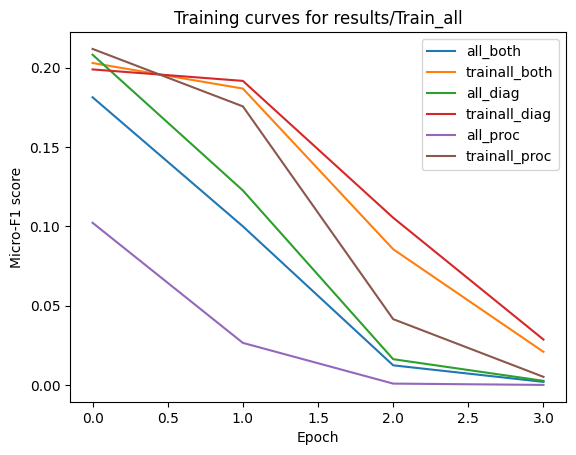

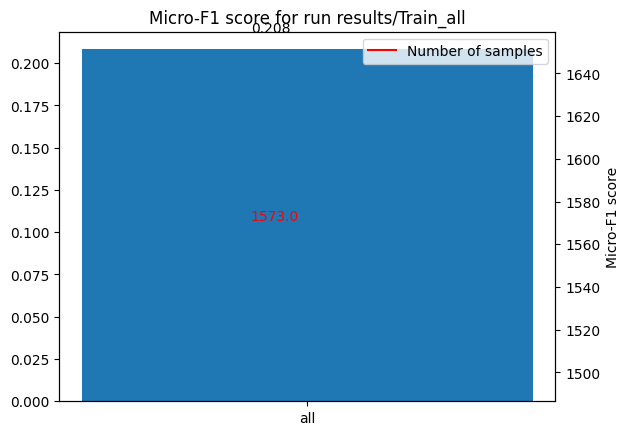

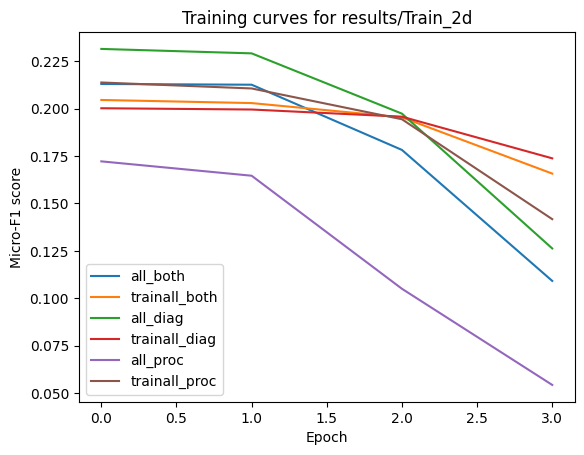

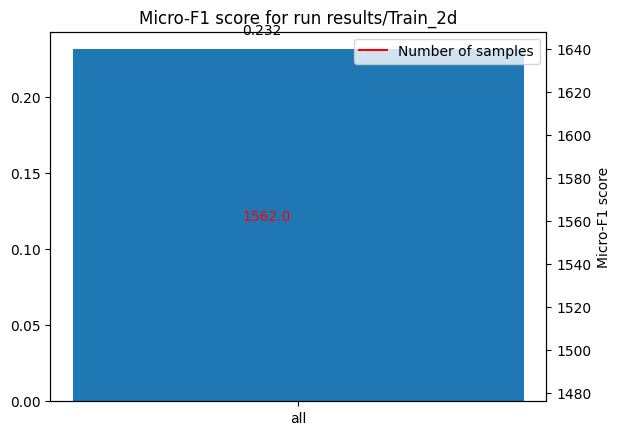

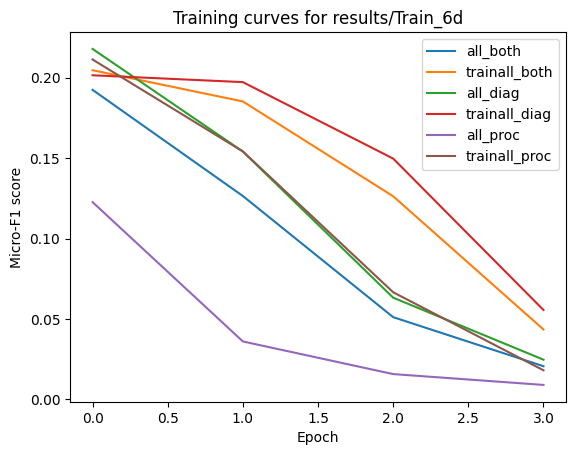

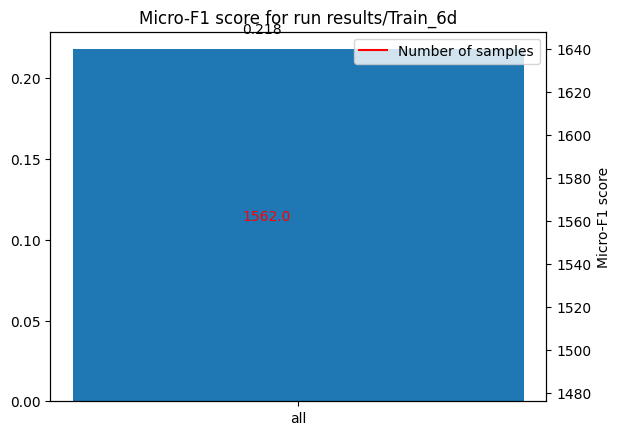

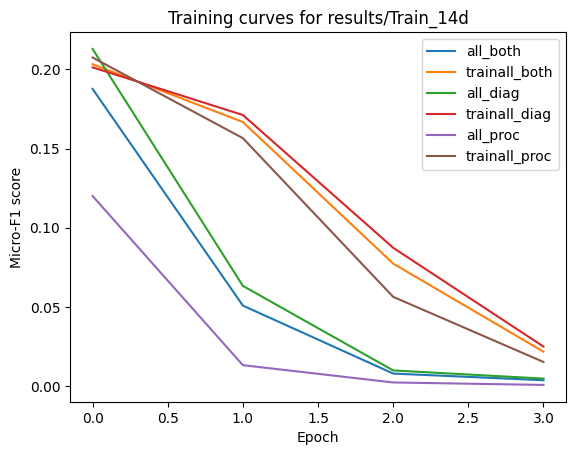

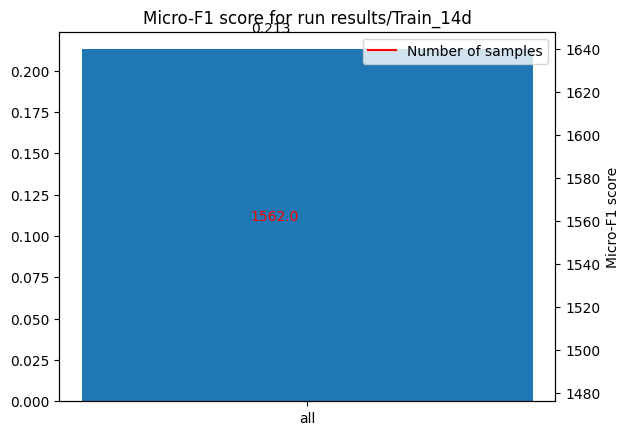

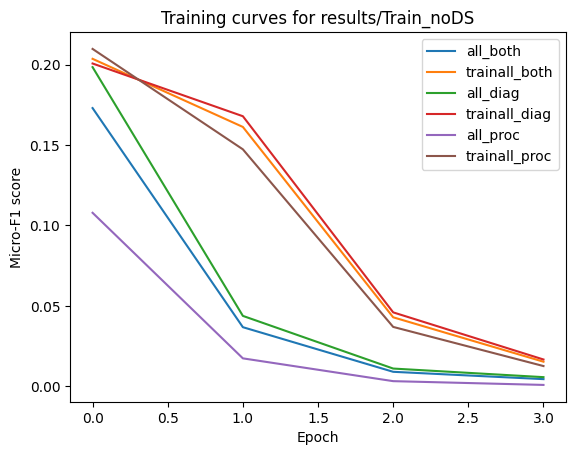

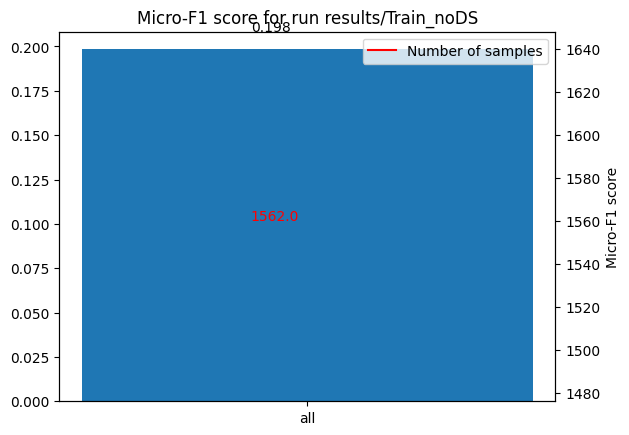

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# run_name = 'results/Definitive_temp_4'
run_names = [f"results/Train_{exp}" for exp in ['all','2d','6d','14d', 'noDS']]
for run_name in run_names:
    plot_training(get_results(run_name, is_temp=False, is_sep=True), run_name=run_name)
    plot_performance(get_results(run_name, is_temp=False, is_sep=True), eval_type='diag', run_name=run_name)




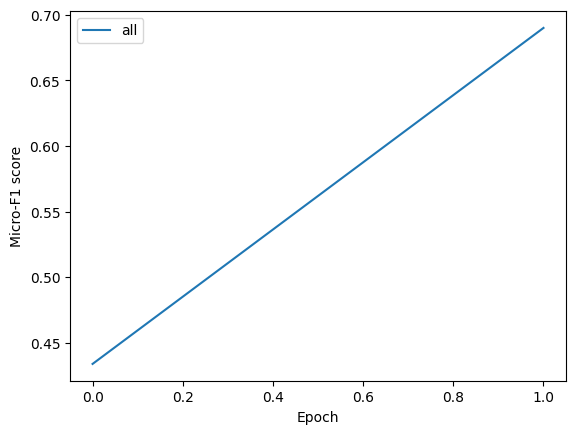

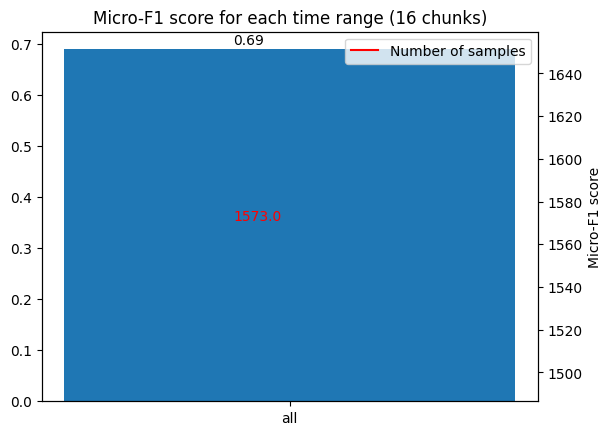

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
run_name = 'results/Grad_Select_16_chunks'a

plot_training(get_results(run_name, is_temp=False))
plot_performance(get_results(run_name, is_temp=False))


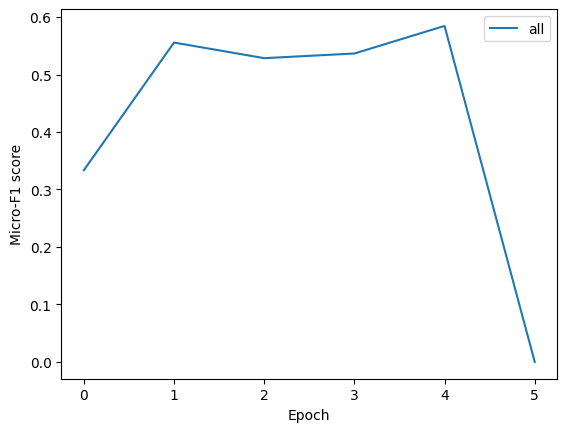

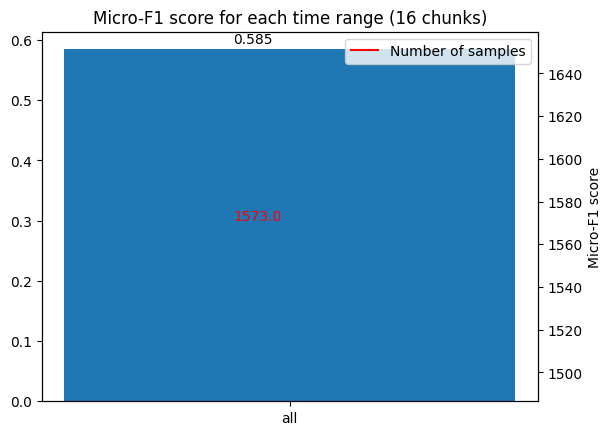

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
run_name = 'results/Grad_Select_4_chunks'
plot_training(get_results(run_name, is_temp=False))
plot_performance(get_results(run_name, is_temp=False))


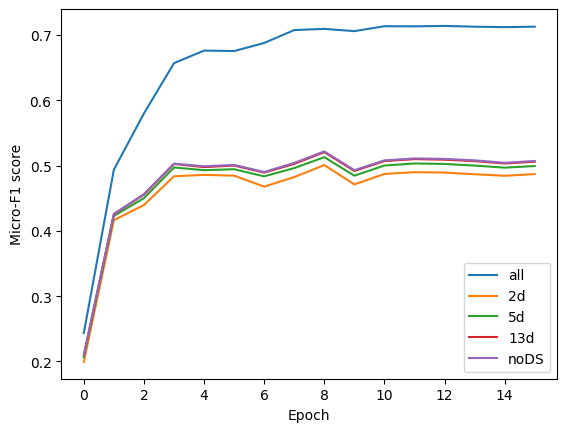

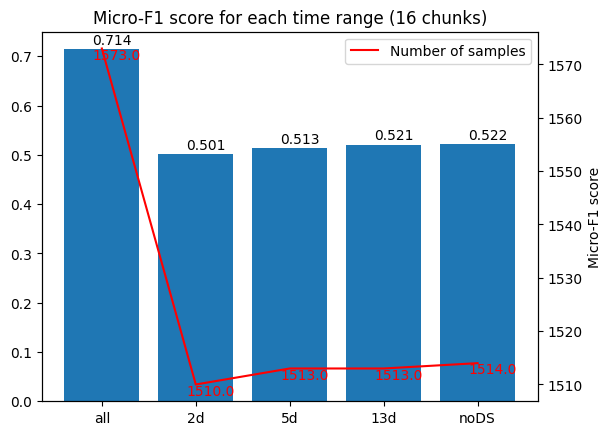

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
run_name = 'results/Bug_fix_temp_16_chunks'
plot_training(get_results(run_name, is_temp=True))
plot_performance(get_results(run_name, is_temp=True))


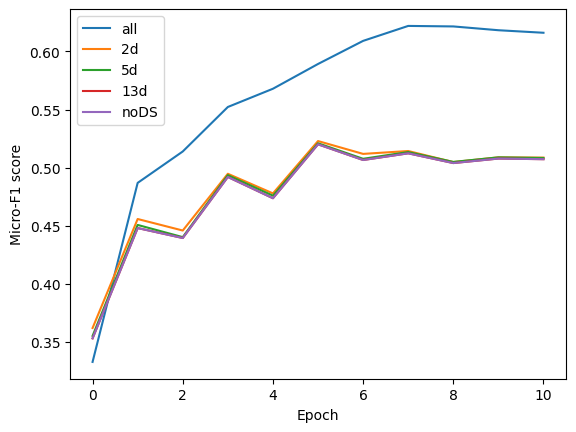

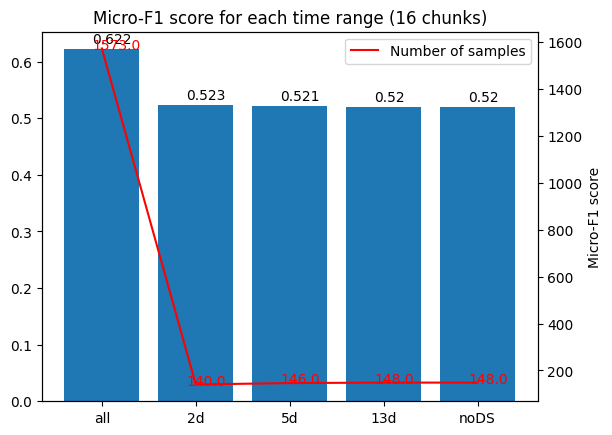

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
run_name = 'results/Definitive_temp_4'
plot_training(get_results(run_name, is_temp=True))
plot_performance(get_results(run_name, is_temp=True))


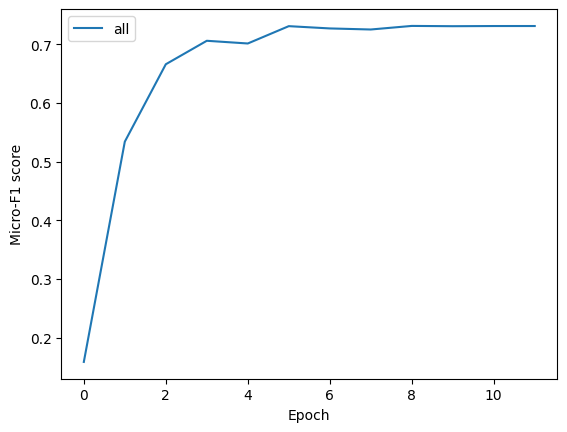

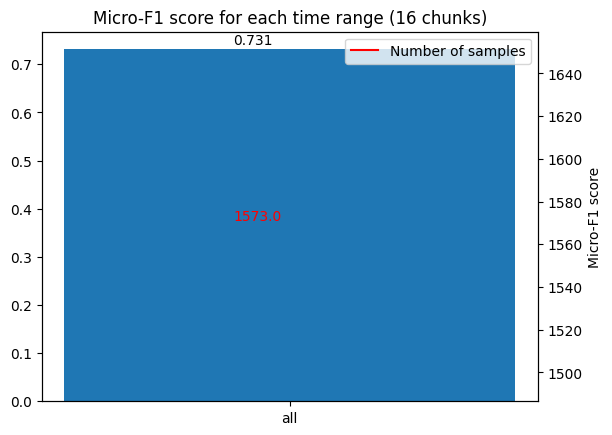

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
run_name = 'results/Bug_fix_no_temp_16_chunks'
plot_training(get_results(run_name, is_temp=False))
plot_performance(get_results(run_name, is_temp=False))